In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

from utils.base_set import X_train, y_train, seed

### Decision Tree

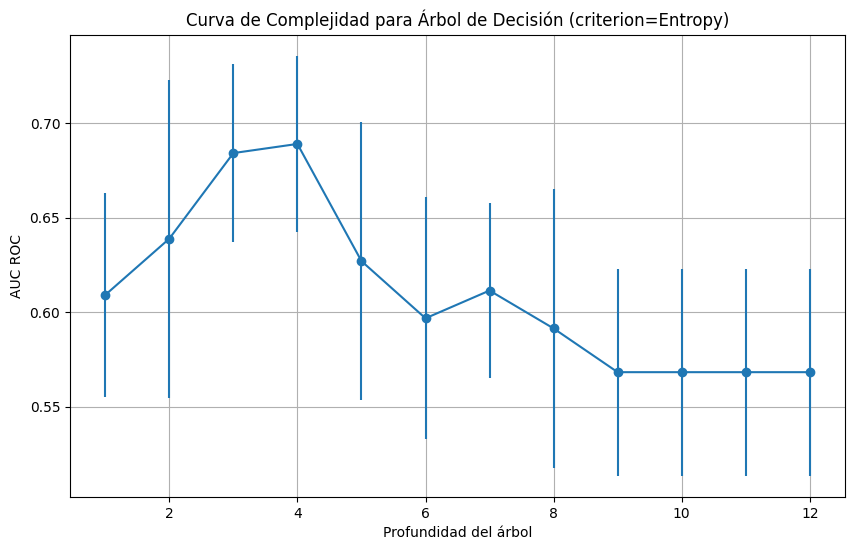

In [13]:
max_depth_values = range(1, 13)

mean_auc_scores = []
std_auc_scores = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

for max_depth in max_depth_values:
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, max_features=135, random_state=seed)
    
    auc_scores = cross_val_score(tree, X_train, y_train, cv=cv, scoring='roc_auc')
    mean_auc_scores.append(np.mean(auc_scores))
    std_auc_scores.append(np.std(auc_scores))

plt.figure(figsize=(10, 6))
plt.errorbar(max_depth_values, mean_auc_scores, yerr=std_auc_scores, fmt='-o')
plt.xlabel('Profundidad del árbol')
plt.ylabel('AUC ROC')
plt.title('Curva de Complejidad para Árbol de Decisión (criterion=Entropy)')
plt.grid(True)
plt.show()
